<a href="https://colab.research.google.com/github/Cropus/Minimization/blob/main/Minimization_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание

Реализовать алгоритмы одномерной оптимизации функции без производной:



1.   Метод дихотомии
2.   Метод золотого сечения
3.   Метод Фибоначчи
4.   Метод парабол
5.   Комбинированный метод Брента

# Реализация методов

In [ ]:
# Импорт
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as m

## Дихотомия

In [ ]:
# 1. Метод дихотомии
def dichotomy(f, a, b, precision):
  ai, bi = a, b
  prec = []

  prev_int = abs(a - b)
  col_names = ['Interval', 'Ratio', 'a', 'b', 'mid', 'f(a)', 'f(b)', 'calculations']
  df = pd.DataFrame(columns = col_names)

  while abs(ai - bi) > precision:
    xMid = (ai+bi) / 2
    x1 = xMid - (precision / 4)
    x2 = xMid + (precision / 4)
    fx1 = f(x1)
    fx2 = f(x2)
    
    prec.append(m.log(abs(ai-bi)))
    df.loc[len(df)] = [abs(ai - bi), abs(ai - bi)/prev_int, x1, x2, xMid, fx1, fx2, 2]
    prev_int = abs(ai - bi)

    if fx1 < fx2:
      bi = x2
    elif fx1 > fx2:
      ai = x1
    else:
      ai = x1
      bi = x2
  
  return df, (ai + bi)/2, f((ai + bi)/2), prec

## Золотое сечение

In [ ]:
# 2. Метод золотого сечения
phi = (1+m.sqrt(5))/2
resphi = 2 - phi

def goldenRatio(f, a, b, precision):
  ai, bi = a, b
  x1 = ai + resphi * (b - a)
  x2 = bi - resphi * (b - a)
  y1 = f(x1)
  y2 = f(x2)
  prec = []

  prev_int = 1
  col_names = ['Interval', 'Ratio', 'a', 'b', 'f(a)', 'f(b)', 'calculations']
  df = pd.DataFrame(columns = col_names)
  prev_int = abs(ai - bi)
  df.loc[len(df)] = [prev_int, prev_int/prev_int, x1, x2, y1, y2, 2]
  prec.append(m.log(abs(ai-bi)))

  while abs(ai - bi) > precision:
    if y1 < y2:
      bi = x2
      x2 = x1
      y2 = y1
      x1 = ai + resphi * (bi-ai)
      y1 = f(x1)
    else:
      ai = x1
      x1 = x2
      y1 = y2
      x2 = bi - resphi * (bi - ai)
      y2 = f(x2)
    
    prec.append(m.log(abs(ai-bi)))
    df.loc[len(df)] = [abs(ai - bi), abs(ai - bi)/prev_int, x1, x2, y1, y2, 1]
    prev_int = abs(ai - bi)

  return df, (ai + bi)/2, f((ai + bi)/2), prec

## Фибоначчи

In [ ]:
# 3. Метод Фибоначчи

def fibonacci_min(f, a, b, e):
  prec = []
  prev_int = 1
  col_names = ['Interval', 'Ratio', 'a', 'b', 'f(a)', 'f(b)', 'calculations']
  df = pd.DataFrame(columns = col_names)
  
  def fibonacci(n):
      return (1 / m.sqrt(5)) * (((1 + m.sqrt(5)) / 2) ** n - ((1 - m.sqrt(5)) / 2) ** n)
  
  def find_dot(a, b, n, k, is_first):
      if is_first:
          return a + (fibonacci(n - k - 1) * (b - a)) / fibonacci(n - k + 1)
      else:
          return a + (fibonacci(n - k) * (b - a)) / fibonacci(n - k + 1)
      
  n = 0
  while (b - a) / e >= fibonacci(n + 2):
      n += 1
      
  x1 = find_dot(a, b, n, 1, True)
  x2 = find_dot(a, b, n, 1, False)
  

  prec.append(m.log(abs(a-b)))
  df.loc[len(df)] = [abs(a - b), abs(a - b)/prev_int, a, b, f(x1), f(x2), 2]

  prev_int = abs(a - b)
      
  for k in range(2, n + 1):
      
      if f(x1) > f(x2):
          a = x1
          x1 = x2
          x2 = find_dot(a, b, n, k, False)
      else:
          b = x2
          x2 = x1
          x1 = find_dot(a, b, n, k, True)

      prec.append(m.log(abs(a-b)))
      df.loc[len(df)] = [abs(a - b), abs(a - b)/prev_int, a, b, f(x1), f(x2), 1]
      prev_int = abs(a - b)
          
      if k == n - 2:
          break
          
  x_min = (x1 + x2) / 2
  f_min = f(x_min)
  
  return df, x_min, f_min, prec

## Метод парабол

In [ ]:
# 4. Метод парабол
def parabolic_minimum(x1, x2, x3, y1, y2, y3):
      return x2 - 0.5 * ((x2 - x1) ** 2 * (y2 - y3) - (x2 - x3) ** 2 * (y2 - y1)) / (
          (x2 - x1) * (y2 - y3) - (x2 - x3) * (y2 - y1))

def parabolic(f, a, b, e):
  history = list()
  prev_int = 1
  prec = []

  col_names = ['abs(x3-x2)', 'Ratio', 'x1', 'x2', 'x3', 'f(x1)', 'f(x2)', 'f(x3)', 'calculations']
  df = pd.DataFrame(columns = col_names)
  
  x1, x2, x3 = a, (a + b) / 2, b
  y1, y2, y3 = f(x1), f(x2), f(x3)

  prec.append(m.log(abs(x3-x2)))
  df.loc[len(df)] = [abs(x3 - x2), abs(x3 - x2)/prev_int, x1, x2, x3, f(x1), f(x2), f(x3), 3]
  prev_int = abs(x3 - x2)
  

  while (x3 - x1 >= e):

      u = parabolic_minimum(x1, x2, x3, y1, y2, y3)
      yu = f(u)

      if u < x2:
          if yu < y2:
              x3, y3 = x2, y2
              x2, y2 = u, yu

          else:

              x1, y1 = u, yu
      else:

          if yu < y2:
              x1, y1 = x2, y2
              x2, y2 = u, yu

          else:
              x3, y3 = u, yu

      prec.append(m.log(abs(x3-x2)))
      df.loc[len(df)] = [abs(x3 - x2), abs(a - b)/prev_int, x1, x2, x3, f(x1), f(x2), f(x3), 1]
      prev_int = abs(x3 - x2)
      
  x_min = (x1 + x3) / 2
  f_min = f(x_min)
      
  return df, x_min, f_min, prec

## Метод Брента

In [ ]:
# 5. Комбинированный метод Брента
def brent(f, a, b, precision):
  ai, bi = a, b
  prec = []

  prev_int = 1
  col_names = ['Interval', 'Ratio', 'a', 'b', 'x', 'w', 'v', 'u', 'f(x)', 'f(w)', 'f(v)', 'f(u)', 'calculations']
  df = pd.DataFrame(columns = col_names)

  k = (3 - m.sqrt(5))/2
  x = w = v = (ai + bi) / 2
  yx = yw = yv = f(x)
  d = e = bi - ai

  prec.append(m.log(abs(ai-bi)))
  df.loc[len(df)] = [abs(ai - bi), abs(ai - bi)/prev_int, ai, bi, x, w, v, 0, yx, yw, yv, 0, 3]
  prev_int = abs(ai-bi)
  

  while abs(ai - bi) > precision:
    g, e = e, d
    is_accepted = False

    if (x != w != v and yx != yw != yv and ((w - x) * (yw - yv) - (w - v) * (yw - yx)) != 0):
      cur_u = parabolic_minimum(x, w, v, yx, yw, yv)
      if (ai+precision < cur_u and
          bi-precision > cur_u and
         abs(cur_u-x) < g/2):       
        u = cur_u
        d = abs(u-x)
        is_accepted = True
    if (not is_accepted):
      if (x < (bi + ai)/2):
        u = x + k*(bi-x)
        d = bi - x
      else:
        u = x - k*(x-ai)
        d = x - ai
      if (abs(u-x) < precision):
        u = x + m.copysign(1, u-x)*precision
  
    yu = f(u)
    if (yu <= yx):
      if (u >= x):
        ai = x
      else:
        bi = x
      v, w, x, yv, yw, yx = w, x, u, yw, yx, yu
    else:
      if (u >= x):
        bi = u
      else:
        ai = u
      if (yu <= yw or w == x):
        v, w, yv, yw = w, u, yw, yu
      elif (yu <= yv or v == x or v == w):
        v, yv = u, yu

    if (abs(ai-bi) == prev_int):
      return df, x, yx, prec
    
    prec.append(m.log(abs(ai-bi)))
    df.loc[len(df)] = [abs(ai - bi), abs(ai - bi)/prev_int, ai, bi, x, w, v, u, yx, yw, yv, yu, 1]
    prev_int = abs(ai-bi)
  
  return df, x, yx, prec

# Тестирование


In [ ]:
# Объявление функций
f1 = lambda x: (-5*x**5)+(4*x**4)-(12*x**3)+(11*x**2)-(2*x)+1
f2 = lambda x: m.log(x - 2, 10) ** 2 + m.log(10 - x, 10) ** 2 - x ** 0.2
f3 = lambda x: -3*m.sin(0.75*x)+m.exp(-2*x)
f4 = lambda x: m.exp(3*x)+5*m.exp(-2*x)
f5 = lambda x: 0.2*x*m.log(x)+(x-2.3)**2

# Начальные границы
f1_a, f1_b = -0.5, 0.5
f2_a, f2_b = 6, 9.9
f3_a, f3_b = 0, 2*m.pi
f4_a, f4_b = 0, 1
f5_a, f5_b = 0.5, 2.5
precision = 0.1

## Дихотомия


### f1

In [ ]:
df, answer, ans, prec = dichotomy(f1, f1_a, f1_b, precision)
print(f'x: {answer}')
print(f'f(x): {ans}')
calc = int(df['calculations'].sum())
print(f'Количество вычислений: {calc}')
df

x: 0.10390625000000002
f(x): 0.8978928992380548
Количество вычислений: 10


,Interval,Ratio,a,b,mid,f(a),f(b),calculations
0,1.000000,1.000000,-0.025000,0.025000,0.000000,1.057064,0.956689,2.0
1,0.525000,0.525000,0.212500,0.262500,0.237500,0.962560,1.028675,2.0
2,0.287500,0.547619,0.093750,0.143750,0.118750,0.899565,0.905560,2.0
3,0.168750,0.586957,0.034375,0.084375,0.059375,0.943766,0.902534,2.0
4,0.109375,0.648148,0.064063,0.114063,0.089063,0.913926,0.897761,2.0


Text(0.5, 0, 'log(precision)')

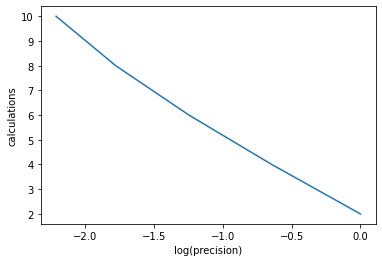

In [ ]:
calculations = np.linspace(2, calc, len(prec))
plt.plot(prec, calculations)
plt.ylabel("calculations")
plt.xlabel("log(precision)")

### f2

In [ ]:
df, answer, ans, prec = dichotomy(f2, f2_a, f2_b, precision)
print(f'x: {answer}')
print(f'f(x): {ans}')
calc = int(df['calculations'].sum())
print(f'Количество вычислений: {calc}')
df

x: 8.7169921875
f(x): -0.8460289908827466
Количество вычислений: 14


,Interval,Ratio,a,b,mid,f(a),f(b),calculations
0,3.900000,1.000000,7.925000,7.975000,7.950000,-0.815316,-0.818171,2.0
1,1.975000,0.506410,8.887500,8.937500,8.912500,-0.843455,-0.841369,2.0
2,1.012500,0.512658,8.406250,8.456250,8.431250,-0.839223,-0.840994,2.0
3,0.531250,0.524691,8.646875,8.696875,8.671875,-0.845523,-0.845962,2.0
4,0.290625,0.547059,8.767188,8.817188,8.792188,-0.845892,-0.845275,2.0
5,0.170313,0.586022,8.707031,8.757031,8.732031,-0.846004,-0.845957,2.0
6,0.110156,0.646789,8.676953,8.726953,8.701953,-0.845832,-0.846037,2.0


Text(0.5, 0, 'log(precision)')

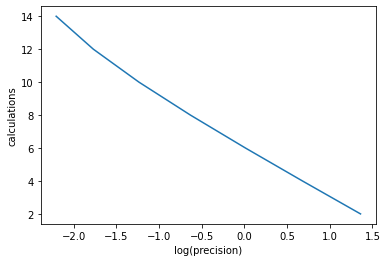

In [ ]:
calculations = np.linspace(2, calc, len(prec))
plt.plot(prec, calculations)
plt.ylabel("calculations")
plt.xlabel("log(precision)")

### f3

In [ ]:
df, answer, ans, prec = dichotomy(f3, f3_a, f3_b, precision)
print(f'x: {answer}')
print(f'f(x): {ans}')
calc = int(df['calculations'].sum())
print(f'Количество вычислений: {calc}')
df

x: 2.0946123090244715
f(x): -2.9848419266097115
Количество вычислений: 14


,Interval,Ratio,a,b,mid,f(a),f(b),calculations
0,6.283185,1.000000,3.116593,3.166593,3.141593,-2.158757,-2.079399,2.0
1,3.166593,0.503979,1.558296,1.608296,1.583296,-2.716446,-2.762736,2.0
2,1.608296,0.507895,2.337444,2.387444,2.362444,-2.940968,-2.919393,2.0
3,0.829148,0.515544,1.947870,1.997870,1.972870,-2.961575,-2.973748,2.0
4,0.439574,0.530151,2.142657,2.192657,2.167657,-2.984266,-2.979398,2.0
5,0.244787,0.556873,2.045264,2.095264,2.070264,-2.981233,-2.984861,2.0
6,0.147394,0.602130,2.093961,2.143961,2.118961,-2.984822,-2.984194,2.0


Text(0.5, 0, 'log(precision)')

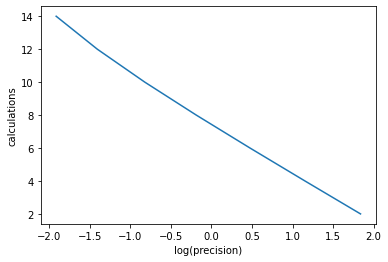

In [ ]:
calculations = np.linspace(2, calc, len(prec))
plt.plot(prec, calculations)
plt.ylabel("calculations")
plt.xlabel("log(precision)")

### f4

In [ ]:
df, answer, ans, prec = dichotomy(f4, f4_a, f4_b, precision)
print(f'x: {answer}')
print(f'f(x): {ans}')
calc = int(df['calculations'].sum())
print(f'Количество вычислений: {calc}')
df

x: 0.24765625000000002
f(x): 5.14906929918352
Количество вычислений: 10


,Interval,Ratio,a,b,mid,f(a),f(b),calculations
0,1.000000,1.000000,0.475000,0.525000,0.500000,6.091563,6.580430,2.0
1,0.525000,0.525000,0.237500,0.287500,0.262500,5.148508,5.182600,2.0
2,0.287500,0.547619,0.118750,0.168750,0.143750,5.370949,5.226818,2.0
3,0.168750,0.586957,0.178125,0.228125,0.203125,5.207869,5.150809,2.0
4,0.109375,0.648148,0.207813,0.257813,0.232813,5.164968,5.152840,2.0


Text(0.5, 0, 'log(precision)')

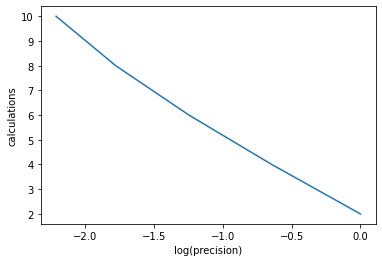

In [ ]:
calculations = np.linspace(2, calc, len(prec))
plt.plot(prec, calculations)
plt.ylabel("calculations")
plt.xlabel("log(precision)")

### f5

In [ ]:
df, answer, ans, prec = dichotomy(f5, f5_a, f5_b, precision)
print(f'x: {answer}')
print(f'f(x): {ans}')
calc = int(df['calculations'].sum())
print(f'Количество вычислений: {calc}')
df

x: 2.124609375
f(x): 0.35097788110683814
Количество вычислений: 12


,Interval,Ratio,a,b,mid,f(a),f(b),calculations
0,2.000000,1.000000,1.475000,1.525000,1.500000,0.795279,0.729333,2.0
1,1.025000,0.512500,1.962500,2.012500,1.987500,0.378537,0.364156,2.0
2,0.537500,0.524390,2.206250,2.256250,2.231250,0.357948,0.369098,2.0
3,0.293750,0.546512,2.084375,2.134375,2.109375,0.352676,0.351077,2.0
4,0.171875,0.585106,2.145313,2.195312,2.170313,0.351425,0.356205,2.0
5,0.110937,0.645455,2.114844,2.164844,2.139844,0.351078,0.352670,2.0


Text(0.5, 0, 'log(precision)')

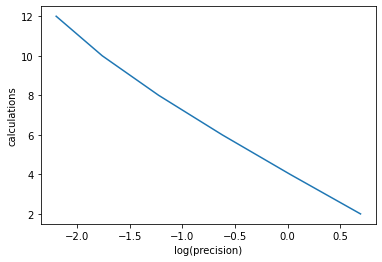

In [ ]:
calculations = np.linspace(2, calc, len(prec))
plt.plot(prec, calculations)
plt.ylabel("calculations")
plt.xlabel("log(precision)")

## Золотое сечение

### f1

In [ ]:
df, answer, ans, prec = goldenRatio(f1, f1_a, f1_b, precision)
print(f'x: {answer}')
print(f'f(x): {ans}')
calc = int(df['calculations'].sum())
print(f'Количество вычислений: {calc}')
df

x: 0.12867710687599893
f(x): 0.900134499831427
Количество вычислений: 7


,Interval,Ratio,a,b,f(a),f(b),calculations
0,1.000000,1.000000,-0.118034,0.118034,1.409945,0.898113,2.0
1,0.618034,0.618034,0.118034,0.263932,0.898113,1.030777,1.0
2,0.381966,0.618034,0.027864,0.118034,0.952555,0.898113,1.0
3,0.236068,0.618034,0.118034,0.173762,0.898113,0.924499,1.0
4,0.145898,0.618034,0.083592,0.118034,0.902845,0.898113,1.0
5,0.090170,0.618034,0.118034,0.139320,0.898113,0.903665,1.0


Text(0.5, 0, 'log(precision)')

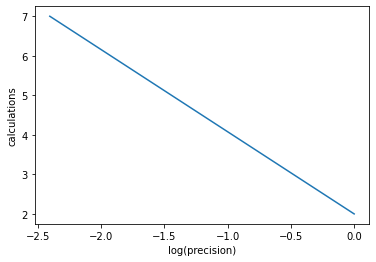

In [ ]:
calculations = [2]
calculations.extend(np.linspace(3, calc, calc-2))
plt.plot(prec, calculations)
plt.ylabel("calculations")
plt.xlabel("log(precision)")

### f2

In [ ]:
df, answer, ans, prec = goldenRatio(f2, f2_a, f2_b, precision)
print(f'x: {answer}')
print(f'f(x): {ans}')
calc = int(df['calculations'].sum())
print(f'Количество вычислений: {calc}')
df

x: 8.720487176055734
f(x): -0.8460338526774193
Количество вычислений: 10


,Interval,Ratio,a,b,f(a),f(b),calculations
0,3.900000,1.000000,7.489667,8.410333,-0.789152,-0.839375,2.0
1,2.410333,0.618034,8.410333,8.979335,-0.839375,-0.839031,1.0
2,1.489667,0.618034,8.058670,8.410333,-0.822818,-0.839375,1.0
3,0.920665,0.618034,8.410333,8.627672,-0.839375,-0.845259,1.0
4,0.569002,0.618034,8.627672,8.761995,-0.845259,-0.845928,1.0
5,0.351663,0.618034,8.761995,8.845012,-0.845928,-0.844698,1.0
6,0.217340,0.618034,8.710688,8.761995,-0.846015,-0.845928,1.0
7,0.134323,0.618034,8.678979,8.710688,-0.845848,-0.846015,1.0
8,0.083016,0.618034,8.710688,8.730286,-0.846015,-0.846036,1.0


Text(0.5, 0, 'log(precision)')

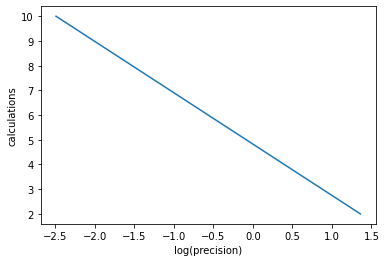

In [ ]:
calculations = [2]
calculations.extend(np.linspace(3, calc, calc-2))
plt.plot(prec, calculations)
plt.ylabel("calculations")
plt.xlabel("log(precision)")

### f3

In [ ]:
df, answer, ans, prec = goldenRatio(f3, f3_a, f3_b, precision)
print(f'x: {answer}')
print(f'f(x): {ans}')
calc = int(df['calculations'].sum())
print(f'Количество вычислений: {calc}')
df

x: 2.0911429047183914
f(x): -2.984727497808
Количество вычислений: 11


,Interval,Ratio,a,b,f(a),f(b),calculations
0,6.283185,1.000000,2.399963,3.883222,-2.913331,-0.681102,2.0
1,3.883222,0.618034,1.483259,2.399963,-2.638866,-2.913331,1.0
2,2.399963,0.618034,2.399963,2.966518,-2.913331,-2.378152,1.0
3,1.483259,0.618034,2.049813,2.399963,-2.981744,-2.913331,1.0
4,0.916704,0.618034,1.833409,2.049813,-2.917155,-2.981744,1.0
5,0.566554,0.618034,2.049813,2.183559,-2.981744,-2.980607,1.0
6,0.350150,0.618034,1.967154,2.049813,-2.966791,-2.981744,1.0
7,0.216405,0.618034,2.049813,2.100899,-2.981744,-2.984996,1.0
8,0.133745,0.618034,2.100899,2.132472,-2.984996,-2.984724,1.0
9,0.082659,0.618034,2.081386,2.100899,-2.984293,-2.984996,1.0


Text(0.5, 0, 'log(precision)')

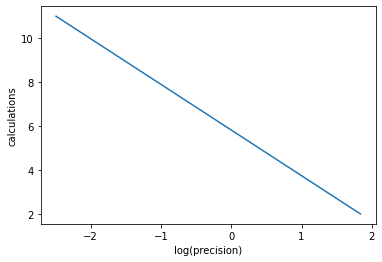

In [ ]:
calculations = [2]
calculations.extend(np.linspace(3, calc, calc-2))
plt.plot(prec, calculations)
plt.ylabel("calculations")
plt.xlabel("log(precision)")

### f4

In [ ]:
df, answer, ans, prec = goldenRatio(f4, f4_a, f4_b, precision)
print(f'x: {answer}')
print(f'f(x): {ans}')
calc = int(df['calculations'].sum())
print(f'Количество вычислений: {calc}')
df

x: 0.24671109562589374
f(x): 5.1488821576289965
Количество вычислений: 7


,Interval,Ratio,a,b,f(a),f(b),calculations
0,1.000000,1.000000,0.381966,0.618034,5.474420,7.838582,2.0
1,0.618034,0.618034,0.236068,0.381966,5.148685,5.474420,1.0
2,0.381966,0.618034,0.145898,0.236068,5.283735,5.148685,1.0
3,0.236068,0.618034,0.236068,0.291796,5.148685,5.189260,1.0
4,0.145898,0.618034,0.201626,0.236068,5.171747,5.148685,1.0
5,0.090170,0.618034,0.236068,0.257354,5.148685,5.152600,1.0


Text(0.5, 0, 'log(precision)')

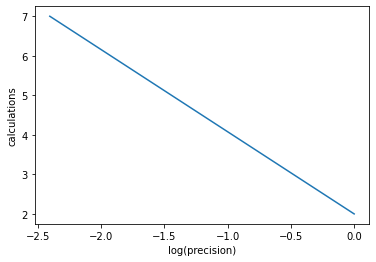

In [ ]:
calculations = [2]
calculations.extend(np.linspace(3, calc, calc-2))
plt.plot(prec, calculations)
plt.ylabel("calculations")
plt.xlabel("log(precision)")

### f5

In [ ]:
df, answer, ans, prec = goldenRatio(f5, f5_a, f5_b, precision)
print(f'x: {answer}')
print(f'f(x): {ans}')
calc = int(df['calculations'].sum())
print(f'Количество вычислений: {calc}')
df

x: 2.13118960624632
f(x): 0.3510227975630489
Количество вычислений: 9


,Interval,Ratio,a,b,f(a),f(b),calculations
0,2.000000,1.000000,1.263932,1.736068,1.132646,0.509550,2.0
1,1.236068,0.618034,1.736068,2.027864,0.509550,0.360791,1.0
2,0.763932,0.618034,2.027864,2.208204,0.360791,0.358285,1.0
3,0.472136,0.618034,2.208204,2.319660,0.358285,0.390749,1.0
4,0.291796,0.618034,2.139320,2.208204,0.351204,0.358285,1.0
5,0.180340,0.618034,2.096748,2.139320,0.351793,0.351204,1.0
6,0.111456,0.618034,2.139320,2.165631,0.351204,0.352737,1.0
7,0.068884,0.618034,2.123059,2.139320,0.350980,0.351204,1.0


Text(0.5, 0, 'log(precision)')

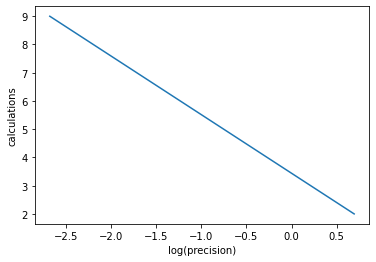

In [ ]:
calculations = [2]
calculations.extend(np.linspace(3, calc, calc-2))
plt.plot(prec, calculations)
plt.ylabel("calculations")
plt.xlabel("log(precision)")

## Метод Фибоначчи

### f1

In [ ]:
df, answer, ans, prec = fibonacci_min(f1, f1_a, f1_b, precision)
print(f'x: {answer}')
print(f'f(x): {ans}')
calc = int(df['calculations'].sum())
print(f'Количество вычислений: {calc}')
df

x: 0.09999999999999995
f(x): 0.89835
Количество вычислений: 4


,Interval,Ratio,a,b,f(a),f(b),calculations
0,1.0,1.000000,-0.5,0.5,1.32245,0.89835,2.0
1,0.6,0.600000,-0.1,0.5,0.89835,1.08625,1.0
2,0.4,0.666667,-0.1,0.3,0.89835,0.89835,1.0


Text(0.5, 0, 'log(precision)')

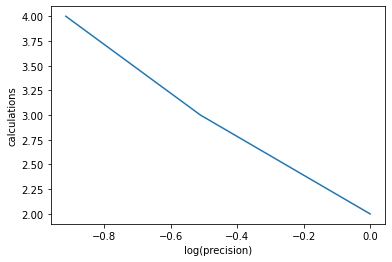

In [ ]:
calculations = [2]
calculations.extend(np.linspace(3, calc, calc-2))
plt.plot(prec, calculations)
plt.ylabel("calculations")
plt.xlabel("log(precision)")

### f2

In [ ]:
df, answer, ans, prec = fibonacci_min(f2, f2_a, f2_b, precision)
print(f'x: {answer}')
print(f'f(x): {ans}')
calc = int(df['calculations'].sum())
print(f'Количество вычислений: {calc}')
df

x: 8.785714285714285
f(x): -0.8457232289690735
Количество вычислений: 7


,Interval,Ratio,a,b,f(a),f(b),calculations
0,3.900000,3.900000,6.000000,9.900000,-0.788910,-0.839521,2.0
1,2.414286,0.619048,7.485714,9.900000,-0.839521,-0.839518,1.0
2,1.485714,0.615385,7.485714,8.971429,-0.821954,-0.839521,1.0
3,0.928571,0.625000,8.042857,8.971429,-0.839521,-0.844794,1.0
4,0.557143,0.600000,8.414286,8.971429,-0.844794,-0.845723,1.0
5,0.371429,0.666667,8.600000,8.971429,-0.845723,-0.845723,1.0


Text(0.5, 0, 'log(precision)')

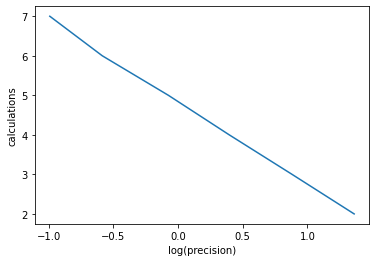

In [ ]:
calculations = [2]
calculations.extend(np.linspace(3, calc, calc-2))
plt.plot(prec, calculations)
plt.ylabel("calculations")
plt.xlabel("log(precision)")

### f3

In [ ]:
df, answer, ans, prec = fibonacci_min(f3, f3_a, f3_b, precision)
print(f'x: {answer}')
print(f'f(x): {ans}')
calc = int(df['calculations'].sum())
print(f'Количество вычислений: {calc}')
df

x: 2.0327952464404544
f(x): -2.979646066764873
Количество вычислений: 8


,Interval,Ratio,a,b,f(a),f(b),calculations
0,6.283185,6.283185,0.000000,6.283185,-2.912124,-0.686426,2.0
1,3.880791,0.617647,0.000000,3.880791,-2.633505,-2.912124,1.0
2,2.402394,0.619048,1.478397,3.880791,-2.912124,-2.391349,1.0
3,1.478397,0.615385,1.478397,2.956793,-2.979646,-2.912124,1.0
4,0.923998,0.625000,1.478397,2.402394,-2.924096,-2.979646,1.0
5,0.554399,0.600000,1.847996,2.402394,-2.979646,-2.975350,1.0
6,0.369599,0.666667,1.847996,2.217595,-2.979646,-2.979646,1.0


Text(0.5, 0, 'log(precision)')

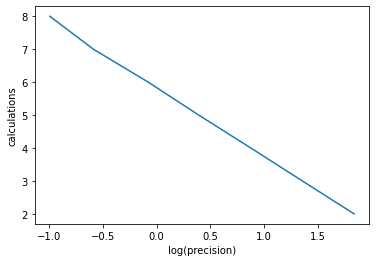

In [ ]:
calculations = [2]
calculations.extend(np.linspace(3, calc, calc-2))
plt.plot(prec, calculations)
plt.ylabel("calculations")
plt.xlabel("log(precision)")

### f4

In [ ]:
df, answer, ans, prec = fibonacci_min(f4, f4_a, f4_b, precision)
print(f'x: {answer}')
print(f'f(x): {ans}')
calc = int(df['calculations'].sum())
print(f'Количество вычислений: {calc}')
df

x: 0.19999999999999996
f(x): 5.173719030568705
Количество вычислений: 4


,Interval,Ratio,a,b,f(a),f(b),calculations
0,1.0,1.000000,0.0,1.0,5.566762,7.555619,2.0
1,0.6,0.600000,0.0,0.6,5.173719,5.566762,1.0
2,0.4,0.666667,0.0,0.4,5.173719,5.173719,1.0


Text(0.5, 0, 'log(precision)')

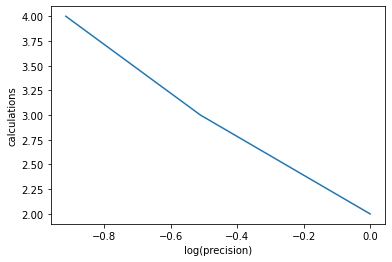

In [ ]:
calculations = [2]
calculations.extend(np.linspace(3, calc, calc-2))
plt.plot(prec, calculations)
plt.ylabel("calculations")
plt.xlabel("log(precision)")

### f5

In [ ]:
df, answer, ans, prec = fibonacci_min(f5, f5_a, f5_b, precision)
print(f'x: {answer}')
print(f'f(x): {ans}')
calc = int(df['calculations'].sum())
print(f'Количество вычислений: {calc}')
df

x: 2.0
f(x): 0.367258872223978
Количество вычислений: 5


,Interval,Ratio,a,b,f(a),f(b),calculations
0,2.00,2.000000,0.50,2.50,1.158286,0.498366,2.0
1,1.25,0.625000,1.25,2.50,0.498366,0.367259,1.0
2,0.75,0.600000,1.75,2.50,0.367259,0.367419,1.0
3,0.50,0.666667,1.75,2.25,0.367259,0.367259,1.0


Text(0.5, 0, 'log(precision)')

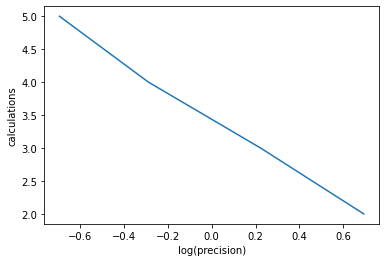

In [ ]:
calculations = [2]
calculations.extend(np.linspace(3, calc, calc-2))
plt.plot(prec, calculations)
plt.ylabel("calculations")
plt.xlabel("log(precision)")

## Метод парабол

### f1

In [ ]:
df, answer, ans, prec = parabolic(f1, f1_a, f1_b, precision)
print(f'x: {answer}')
print(f'f(x): {ans}')
calc = int(df['calculations'].sum())
print(f'Количество вычислений: {calc}')
df

x: 0.10985991781893628
f(x): 0.8976329718961669
Количество вычислений: 20


,abs(x3-x2),Ratio,x1,x2,x3,f(x1),f(x2),f(x3),calculations
0,5.000000e-01,5.000000e-01,-0.50000,0.000000,0.500000,6.656250,1.000000,1.343750,3.0
1,2.786458e-01,2.000000e+00,0.00000,0.221354,0.500000,1.000000,0.973062,1.343750,1.0
2,8.972404e-02,3.588785e+00,0.00000,0.131630,0.221354,1.000000,0.900966,0.973062,1.0
3,1.229626e-02,1.114529e+01,0.00000,0.119334,0.131630,1.000000,0.898276,0.900966,1.0
4,7.292947e-03,8.132553e+01,0.00000,0.112041,0.119334,1.000000,0.897667,0.898276,1.0
5,1.349550e-03,1.371188e+02,0.00000,0.110691,0.112041,1.000000,0.897638,0.897667,1.0
6,6.164184e-04,7.409878e+02,0.00000,0.110075,0.110691,1.000000,0.897633,0.897638,1.0
7,1.402156e-04,1.622275e+03,0.00000,0.109935,0.110075,1.000000,0.897633,0.897633,1.0
8,5.409491e-05,7.131876e+03,0.00000,0.109881,0.109935,1.000000,0.897633,0.897633,1.0
9,1.389443e-05,1.848603e+04,0.00000,0.109867,0.109881,1.000000,0.897633,0.897633,1.0


Text(0.5, 0, 'log(precision)')

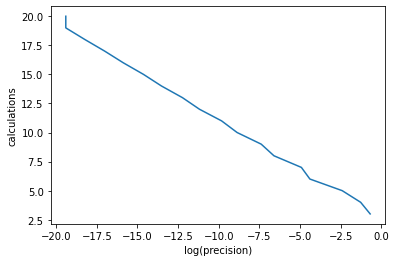

In [ ]:
calculations = [3]
calculations.extend(np.linspace(4, calc, calc-3))
plt.plot(prec, calculations)
plt.ylabel("calculations")
plt.xlabel("log(precision)")

### f2

In [ ]:
df, answer, ans, prec = parabolic(f2, f2_a, f2_b, precision)
print(f'x: {answer}')
print(f'f(x): {ans}')
calc = int(df['calculations'].sum())
print(f'Количество вычислений: {calc}')
df

x: 8.726906431730821
f(x): -0.8460373807219906
Количество вычислений: 209


,abs(x3-x2),Ratio,x1,x2,x3,f(x1),f(x2),f(x3),calculations
0,1.950000e+00,1.950000,6.000000,7.950000,9.900000,-0.706017,-0.816750,0.224024,3.0
1,1.950000e+00,2.000000,7.162520,7.950000,9.900000,-0.769243,-0.816750,0.224024,1.0
2,1.950000e+00,2.000000,7.695259,7.950000,9.900000,-0.801694,-0.816750,0.224024,1.0
3,1.950000e+00,2.000000,7.932536,7.950000,9.900000,-0.815750,-0.816750,0.224024,1.0
4,1.863379e+00,2.000000,7.950000,8.036621,9.900000,-0.816750,-0.821611,0.224024,1.0
...,...,...,...,...,...,...,...,...,...
202,1.173094e+00,3.324542,8.726906,8.726906,9.900000,-0.846037,-0.846037,0.224024,1.0
203,1.173094e+00,3.324542,8.726906,8.726906,9.900000,-0.846037,-0.846037,0.224024,1.0
204,1.173094e+00,3.324542,8.726906,8.726906,9.900000,-0.846037,-0.846037,0.224024,1.0
205,1.173094e+00,3.324542,8.726906,8.726906,9.900000,-0.846037,-0.846037,0.224024,1.0


Text(0.5, 0, 'log(precision)')

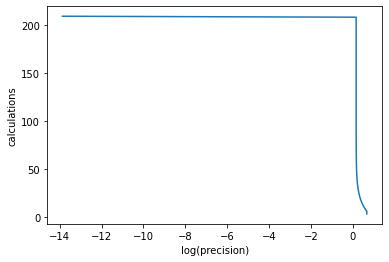

In [ ]:
calculations = [3]
calculations.extend(np.linspace(4, calc, calc-3))
plt.plot(prec, calculations)
plt.ylabel("calculations")
plt.xlabel("log(precision)")

### f3

In [ ]:
df, answer, ans, prec = parabolic(f3, f3_a, f3_b, precision)
print(f'x: {answer}')
print(f'f(x): {ans}')
calc = int(df['calculations'].sum())
print(f'Количество вычислений: {calc}')
df

x: 2.1117551321691295
f(x): -2.985098583290432
Количество вычислений: 15


,abs(x3-x2),Ratio,x1,x2,x3,f(x1),f(x2),f(x3),calculations
0,3.141593e+00,3.141593e+00,0.000000,3.141593,6.283185,1.000000,-2.119453,3.000003,3.0
1,3.813124e-01,2.000000e+00,0.000000,2.760280,3.141593,1.000000,-2.629587,-2.119453,1.0
2,6.015227e-01,1.647779e+01,0.000000,2.158758,2.760280,1.000000,-2.983172,-2.629587,1.0
3,3.269154e-02,1.044547e+01,0.000000,2.126066,2.158758,1.000000,-2.984920,-2.983172,1.0
4,1.358238e-02,1.921961e+02,0.000000,2.112484,2.126066,1.000000,-2.985098,-2.984920,1.0
5,5.532236e-04,4.625981e+02,0.000000,2.111930,2.112484,1.000000,-2.985099,-2.985098,1.0
6,1.648051e-04,1.135741e+04,0.000000,2.111766,2.111930,1.000000,-2.985099,-2.985099,1.0
7,8.298334e-06,3.812493e+04,0.000000,2.111757,2.111766,1.000000,-2.985099,-2.985099,1.0
8,1.999838e-06,7.571622e+05,0.000000,2.111755,2.111757,1.000000,-2.985099,-2.985099,1.0
9,1.189451e-07,3.141848e+06,0.000000,2.111755,2.111755,1.000000,-2.985099,-2.985099,1.0


Text(0.5, 0, 'log(precision)')

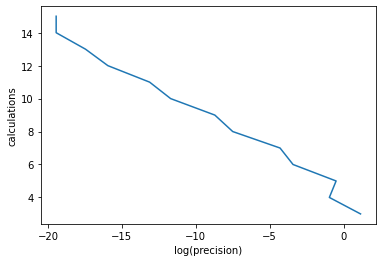

In [ ]:
calculations = [3]
calculations.extend(np.linspace(4, calc, calc-3))
plt.plot(prec, calculations)
plt.ylabel("calculations")
plt.xlabel("log(precision)")

### f4

In [ ]:
df, answer, ans, prec = parabolic(f4, f4_a, f4_b, precision)
print(f'x: {answer}')
print(f'f(x): {ans}')
calc = int(df['calculations'].sum())
print(f'Количество вычислений: {calc}')
df

x: 0.24079455056853838
f(x): 5.148340421395101
Количество вычислений: 16


,abs(x3-x2),Ratio,x1,x2,x3,f(x1),f(x2),f(x3),calculations
0,5.000000e-01,0.500000,0.000000,0.500000,1.000000,6.000000,6.321086,20.762213,3.0
1,2.613699e-01,2.000000,0.000000,0.238630,0.500000,6.000000,5.148413,6.321086,1.0
2,2.613699e-01,3.825996,0.230070,0.238630,0.500000,5.150111,5.148413,6.321086,1.0
3,2.599359e-01,3.825996,0.238630,0.240064,0.500000,5.148413,5.148349,6.321086,1.0
4,2.593715e-01,3.847102,0.240064,0.240629,0.500000,5.148349,5.148341,6.321086,1.0
5,2.592570e-01,3.855474,0.240629,0.240743,0.500000,5.148341,5.148340,6.321086,1.0
6,2.592180e-01,3.857177,0.240743,0.240782,0.500000,5.148340,5.148340,6.321086,1.0
7,2.592091e-01,3.857757,0.240782,0.240791,0.500000,5.148340,5.148340,6.321086,1.0
8,2.592064e-01,3.857889,0.240791,0.240794,0.500000,5.148340,5.148340,6.321086,1.0
9,2.592057e-01,3.857930,0.240794,0.240794,0.500000,5.148340,5.148340,6.321086,1.0


Text(0.5, 0, 'log(precision)')

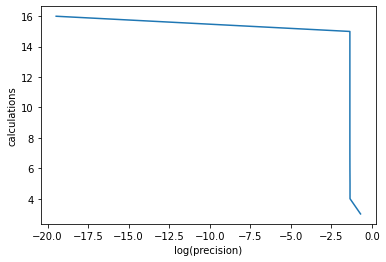

In [ ]:
calculations = [3]
calculations.extend(np.linspace(4, calc, calc-3))
plt.plot(prec, calculations)
plt.ylabel("calculations")
plt.xlabel("log(precision)")

### f5

In [ ]:
df, answer, ans, prec = parabolic(f5, f5_a, f5_b, precision)
print(f'x: {answer}')
print(f'f(x): {ans}')
calc = int(df['calculations'].sum())
print(f'Количество вычислений: {calc}')
df

x: 2.124170028935798
f(x): 0.35097811118534683
Количество вычислений: 6


,abs(x3-x2),Ratio,x1,x2,x3,f(x1),f(x2),f(x3),calculations
0,1.000000,1.000000,0.50000,1.500000,2.500000,3.170685,0.761640,0.498145,3.0
1,0.377190,2.000000,1.50000,2.122810,2.500000,0.761640,0.350981,0.498145,1.0
2,0.374469,5.302361,2.12281,2.125531,2.500000,0.350981,0.350979,0.498145,1.0
3,0.000890,5.340889,2.12281,2.124641,2.125531,0.350981,0.350978,0.350979,1.0


Text(0.5, 0, 'log(precision)')

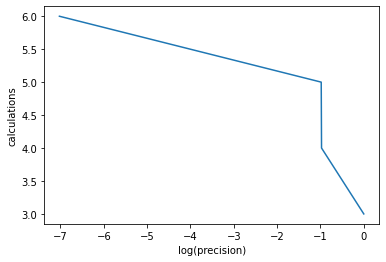

In [ ]:
calculations = [3]
calculations.extend(np.linspace(4, calc, calc-3))
plt.plot(prec, calculations)
plt.ylabel("calculations")
plt.xlabel("log(precision)")

## Комбинированный метод Брента

### f1

In [ ]:
df, answer, ans, prec = brent(f1, f1_a, f1_b, precision)
print(f'x: {answer}')
print(f'f(x): {ans}')
calc = int(df['calculations'].sum())
print(f'Количество вычислений: {calc}')
df

x: 0.10965227039930578
f(x): 0.897633285380253
Количество вычислений: 7


,Interval,Ratio,a,b,x,w,v,u,f(x),f(w),f(v),f(u),calculations
0,1.000000,1.000000,-0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000,3.0
1,0.690983,0.690983,-0.190983,0.500000,0.000000,-0.190983,0.000000,-0.190983,1.000000,1.873370,1.00000,1.873370,1.0
2,0.500000,0.723607,0.000000,0.500000,0.190983,0.000000,-0.190983,0.190983,0.939713,1.000000,1.87337,0.939713,1.0
3,0.190983,0.381966,0.000000,0.190983,0.109652,0.190983,0.000000,0.109652,0.897633,0.939713,1.00000,0.897633,1.0
4,0.181331,0.949460,0.009652,0.190983,0.109652,0.190983,0.009652,0.009652,0.897633,0.939713,0.98171,0.981710,1.0


Text(0.5, 0, 'log(precision)')

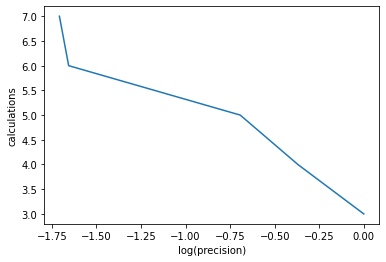

In [ ]:
calculations = [3]
calculations.extend(np.linspace(4, calc, calc-3))
plt.plot(prec, calculations)
plt.ylabel("calculations")
plt.xlabel("log(precision)")

### f2

In [ ]:
df, answer, ans, prec = brent(f2, f2_a, f2_b, precision)
print(f'x: {answer}')
print(f'f(x): {ans}')
calc = int(df['calculations'].sum())
print(f'Количество вычислений: {calc}')
df

x: 8.69525579850973
f(x): -0.8459534909785202
Количество вычислений: 10


,Interval,Ratio,a,b,x,w,v,u,f(x),f(w),f(v),f(u),calculations
0,3.900000,3.900000,6.000000,9.900000,7.950000,7.950000,7.950000,0.000000,-0.816750,-0.816750,-0.816750,0.000000,3.0
1,2.694834,0.690983,7.205166,9.900000,7.950000,7.205166,7.950000,7.205166,-0.816750,-0.771812,-0.816750,-0.771812,1.0
2,1.950000,0.723607,7.950000,9.900000,8.694834,7.950000,7.205166,8.694834,-0.845951,-0.816750,-0.771812,-0.845951,1.0
3,1.205166,0.618034,7.950000,9.155166,8.694834,9.155166,7.950000,9.155166,-0.845951,-0.821423,-0.816750,-0.821423,1.0
4,0.577323,0.479040,8.577843,9.155166,8.694834,8.577843,9.155166,8.577843,-0.845951,-0.844353,-0.821423,-0.844353,1.0
5,0.460333,0.797357,8.694834,9.155166,8.695256,8.694834,8.577843,8.695256,-0.845953,-0.845951,-0.844353,-0.845953,1.0
6,0.176092,0.382533,8.694834,8.870926,8.695256,8.694834,8.577843,8.870926,-0.845953,-0.845951,-0.844353,-0.843994,1.0
7,0.100422,0.570281,8.694834,8.795256,8.695256,8.694834,8.795256,8.795256,-0.845953,-0.845951,-0.845609,-0.845609,1.0


Text(0.5, 0, 'log(precision)')

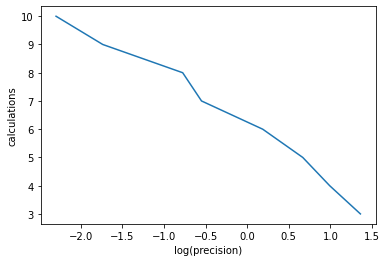

In [ ]:
calculations = [3]
calculations.extend(np.linspace(4, calc, calc-3))
plt.plot(prec, calculations)
plt.ylabel("calculations")
plt.xlabel("log(precision)")

### f3

In [ ]:
df, answer, ans, prec = brent(f3, f3_a, f3_b, precision)
print(f'x: {answer}')
print(f'f(x): {ans}')
calc = int(df['calculations'].sum())
print(f'Количество вычислений: {calc}')
df

x: 2.112054477260801
f(x): -2.985098505082629
Количество вычислений: 8


,Interval,Ratio,a,b,x,w,v,u,f(x),f(w),f(v),f(u),calculations
0,6.283185,6.283185,0.000000,6.283185,3.141593,3.141593,3.141593,0.000000,-2.119453,-2.119453,-2.119453,0.000000,3.0
1,3.141593,0.500000,0.000000,3.141593,1.941611,3.141593,3.141593,1.941611,-2.959742,-2.119453,-2.119453,-2.959742,1.0
2,1.941611,0.618034,1.199982,3.141593,1.941611,1.199982,3.141593,1.199982,-2.959742,-2.259234,-2.119453,-2.259234,1.0
3,1.199982,0.618034,1.941611,3.141593,2.128295,1.941611,1.199982,2.128295,-2.984860,-2.959742,-2.259234,-2.984860,1.0
4,0.186684,0.155573,1.941611,2.128295,2.112054,2.128295,1.941611,2.112054,-2.985099,-2.984860,-2.959742,-2.985099,1.0
5,0.116241,0.622660,2.012054,2.128295,2.112054,2.128295,2.012054,2.012054,-2.985099,-2.984860,-2.976402,-2.976402,1.0


Text(0.5, 0, 'log(precision)')

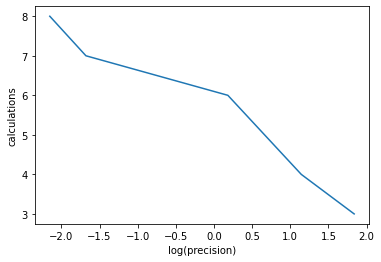

In [ ]:
calculations = [3]
calculations.extend(np.linspace(4, calc, calc-3))
plt.plot(prec, calculations)
plt.ylabel("calculations")
plt.xlabel("log(precision)")

### f4

In [ ]:
df, answer, ans, prec = brent(f4, f4_a, f4_b, precision)
print(f'x: {answer}')
print(f'f(x): {ans}')
calc = int(df['calculations'].sum())
print(f'Количество вычислений: {calc}')
df

x: 0.1909830056250526
f(x): 5.186080651183068
Количество вычислений: 7


,Interval,Ratio,a,b,x,w,v,u,f(x),f(w),f(v),f(u),calculations
0,1.000000,1.000000,0.000000,1.000000,0.500000,0.500000,0.500000,0.000000,6.321086,6.321086,6.321086,0.000000,3.0
1,0.500000,0.500000,0.000000,0.500000,0.309017,0.500000,0.500000,0.309017,5.222061,6.321086,6.321086,5.222061,1.0
2,0.309017,0.618034,0.000000,0.309017,0.190983,0.309017,0.500000,0.190983,5.186081,5.222061,6.321086,5.186081,1.0
3,0.218034,0.705573,0.090983,0.309017,0.190983,0.309017,0.090983,0.090983,5.186081,5.222061,5.481982,5.481982,1.0
4,0.200000,0.917288,0.090983,0.290983,0.190983,0.290983,0.309017,0.290983,5.186081,5.187954,5.222061,5.187954,1.0


Text(0.5, 0, 'log(precision)')

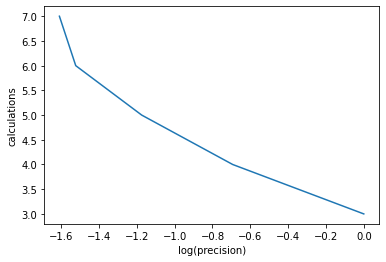

In [ ]:
calculations = [3]
calculations.extend(np.linspace(4, calc, calc-3))
plt.plot(prec, calculations)
plt.ylabel("calculations")
plt.xlabel("log(precision)")

### f5

In [ ]:
df, answer, ans, prec = brent(f5, f5_a, f5_b, precision)
print(f'x: {answer}')
print(f'f(x): {ans}')
calc = int(df['calculations'].sum())
print(f'Количество вычислений: {calc}')
df

x: 2.1239521058020547
f(x): 0.35097837528520137
Количество вычислений: 9


,Interval,Ratio,a,b,x,w,v,u,f(x),f(w),f(v),f(u),calculations
0,2.000000,2.000000,0.500000,2.500000,1.500000,1.500000,1.500000,0.000000,0.761640,0.761640,0.761640,0.000000,3.0
1,1.381966,0.690983,1.118034,2.500000,1.500000,1.118034,1.500000,1.118034,0.761640,1.421992,0.761640,1.421992,1.0
2,1.000000,0.723607,1.500000,2.500000,1.881966,1.500000,1.118034,1.881966,0.412752,0.761640,1.421992,0.412752,1.0
3,0.618034,0.618034,1.881966,2.500000,2.118842,1.881966,1.500000,2.118842,0.351013,0.412752,0.761640,0.351013,1.0
4,0.381158,0.616727,2.118842,2.500000,2.123952,2.118842,1.881966,2.123952,0.350978,0.351013,0.412752,0.350978,1.0
5,0.148748,0.390252,2.118842,2.267590,2.123952,2.118842,2.267590,2.267590,0.350978,0.351013,0.372353,0.372353,1.0
6,0.105110,0.706634,2.118842,2.223952,2.123952,2.118842,2.223952,2.223952,0.350978,0.351013,0.361298,0.361298,1.0


Text(0.5, 0, 'log(precision)')

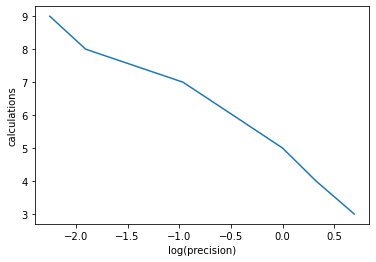

In [ ]:
calculations = [3]
calculations.extend(np.linspace(4, calc, calc-3))
plt.plot(prec, calculations)
plt.ylabel("calculations")
plt.xlabel("log(precision)")

# Графики исходных функций

Text(0.5, 0, 'x')

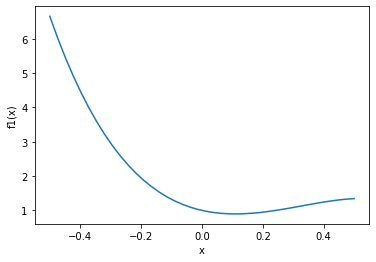

In [ ]:
x = np.linspace(-0.5, 0.5, 40)
y = list(map(f1, x))

plt.plot(x, y)
plt.ylabel("f1(x)")
plt.xlabel("x")

Text(0.5, 0, 'x')

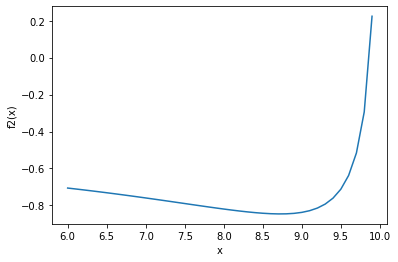

In [ ]:
x = np.linspace(6, 9.9, 40)
y = list(map(f2, x))

plt.plot(x, y)
plt.ylabel("f2(x)")
plt.xlabel("x")

Text(0.5, 0, 'x')

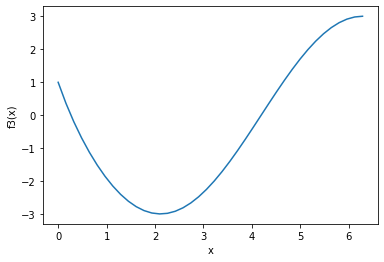

In [ ]:
x = np.linspace(0, 2*m.pi, 40)
y = list(map(f3, x))

plt.plot(x, y)
plt.ylabel("f3(x)")
plt.xlabel("x")

Text(0.5, 0, 'x')

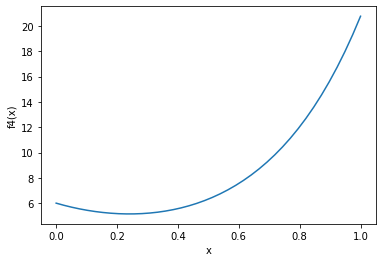

In [ ]:
x = np.linspace(0, 1, 40)
y = list(map(f4, x))

plt.plot(x, y)
plt.ylabel("f4(x)")
plt.xlabel("x")

Text(0.5, 0, 'x')

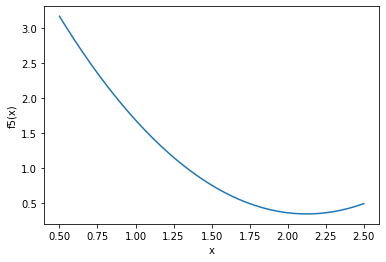

In [ ]:
x = np.linspace(0.5, 2.5, 40)
y = list(map(f5, x))

plt.plot(x, y)
plt.ylabel("f5(x)")
plt.xlabel("x")

# Мультимодальные функции

# Новый раздел

In [ ]:
def f6(x):
    return 0.007 * x ** 6 - 0.15 * x ** 5 + 1.14 * x ** 4 - 3.5 * x ** 3 + 2.9 * x ** 2 + 2.95 * x + 2.25
f6_a = -1
f6_b = 6.5

Text(0.5, 0, 'x')

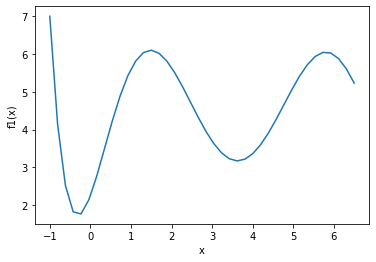

In [ ]:
x = np.linspace(f6_a, f6_b, 40)
y = list(map(f6, x))

plt.plot(x, y)
plt.ylabel("f1(x)")
plt.xlabel("x")

In [ ]:
_, answer, ans, _ = goldenRatio(f6, f6_a, f6_b, precision)

Text(0.5, 0, 'x')

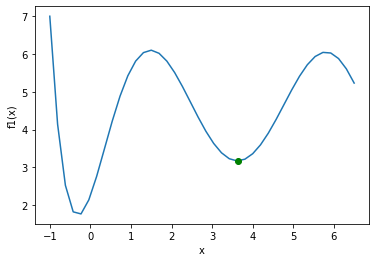

In [ ]:
x = np.linspace(f6_a, f6_b, 40)
y = list(map(f6, x))

plt.plot(x, y)
plt.plot(answer, ans, 'go') 
plt.ylabel("f1(x)")
plt.xlabel("x")

In [ ]:
_, answer, ans, _ = brent(f6, f6_a, f6_b, precision)

Text(0.5, 0, 'x')

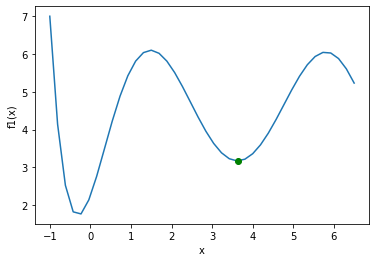

In [ ]:
x = np.linspace(f6_a, f6_b, 40)
y = list(map(f6, x))

plt.plot(x, y)
plt.plot(answer, ans, 'go')
plt.ylabel("f1(x)")
plt.xlabel("x")

На примере выше видно, что методы золотого сечения и Брента не смогли найти правильный минимум мультимодальной функции. Необходимое условие для корректной работы вышеописанных алгоритмов -- унимодальность функции на интересующем отрезке, поскольку сразу же в рассматриваемом интервале мы берем некоторые точки по середине и делаем сравнение значений функции на краях и в середине интервала. Такой подход не преподлагает наличие более одного минимума (или максимума)